In [51]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [20]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for drug'}, xlabel='Drug'>

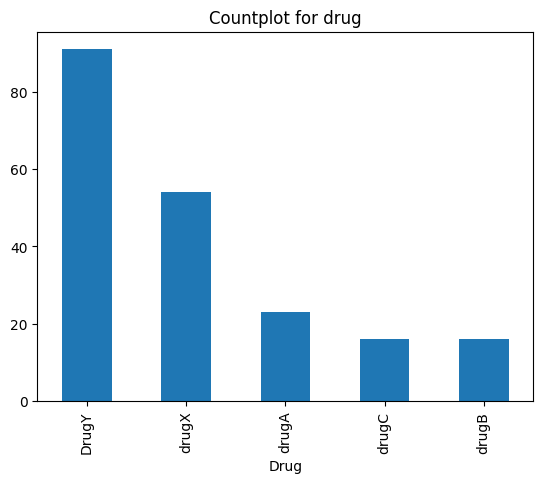

In [21]:
df['Drug'].value_counts().plot(kind='bar', title="Countplot for drug")

### Seperate X and Y features

In [9]:
x = df.drop(columns=['Drug'])
y = df[['Drug']]

In [10]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Seprate Cat and Con featurs

In [13]:
cat = list(x.columns[x.dtypes == 'object'])
con = list(x.columns[x.dtypes != 'object'])

In [14]:
cat

['Sex', 'BP', 'Cholesterol']

In [15]:
con

['Age', 'Na_to_K']

### Create a Preprocessing Pipeline for x

In [34]:
# create a numeric Pipeline
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])
# Create a categorical pipeline
cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# Combine both of them

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [35]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [36]:
x_pre = pre.fit_transform(x)
x_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [37]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [38]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Apply Train Test Split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.3, random_state=42)

In [40]:
xtrain.shape

(140, 9)

In [41]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
169,-1.473377,-0.669244,1.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.708057,1.292073,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,1.798775,-0.904468,0.0,1.0,1.0,0.0,0.0,1.0,0.0
12,-0.079683,-0.098320,0.0,1.0,0.0,1.0,0.0,1.0,0.0
35,0.102103,-1.221155,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [42]:
xtest.shape

(60, 9)

In [43]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [44]:
ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

In [45]:
ytest.value_counts()

Drug 
DrugY    26
drugX    18
drugA     7
drugC     6
drugB     3
Name: count, dtype: int64

### Create a random forest model

In [47]:
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3)
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [48]:
model.score(xtrain, ytrain)

0.7142857142857143

In [49]:
model.score(xtest, ytest)

0.7333333333333333

In [50]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':[2,3,4,5,6,7],
          'min_samples_split':[5,6,7,8,9],
          'criterion':['gini','entropy']
     
         }

In [53]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [54]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 9,
 'max_depth': 3,
 'criterion': 'entropy'}

In [55]:
rscv.best_score_

0.9862857142857143

In [57]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=9,
                       n_estimators=50)

### Evaluate Model in Train and test

In [58]:
best_rfc.score(xtrain, ytrain)

0.9857142857142858

In [59]:
best_rfc.score(xtest, ytest)

0.9666666666666667

### Predict results for train and Test

In [60]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [61]:
ypred_tr[0:5]

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX'], dtype=object)

In [62]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugX', 'DrugY'], dtype=object)

In [63]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


### Create confusion matrix for test results

In [64]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

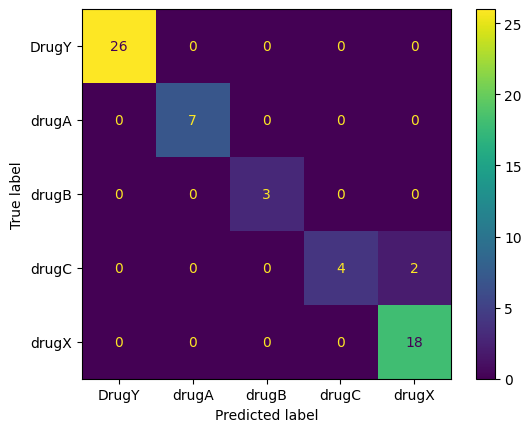

In [65]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

### Create a classification report

In [66]:
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.67      0.80         6
       drugX       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.98      0.93      0.95        60
weighted avg       0.97      0.97      0.96        60



### Predict probabilites

In [67]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [68]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [69]:
yprob_ts[0:5]

array([[0.08741333, 0.04848292, 0.005     , 0.21636914, 0.64273461],
       [0.90211643, 0.08355266, 0.00753846, 0.        , 0.00679245],
       [0.08178413, 0.07129848, 0.02072   , 0.01603671, 0.81016068],
       [0.19819829, 0.00933333, 0.04953144, 0.36870442, 0.37423252],
       [0.85200673, 0.        , 0.        , 0.04208886, 0.10590441]])

### Feature Importance

In [70]:
imp = best_rfc.feature_importances_
imp

array([0.08868398, 0.49964704, 0.00217233, 0.00565781, 0.20012819,
       0.07619048, 0.08861409, 0.01989746, 0.01900862])

In [71]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [72]:
imp = pd.Series(imp)
imp

0    0.088684
1    0.499647
2    0.002172
3    0.005658
4    0.200128
5    0.076190
6    0.088614
7    0.019897
8    0.019009
dtype: float64

In [73]:
imp.index = xtrain.columns
imp

num__Age                   0.088684
num__Na_to_K               0.499647
cat__Sex_F                 0.002172
cat__Sex_M                 0.005658
cat__BP_HIGH               0.200128
cat__BP_LOW                0.076190
cat__BP_NORMAL             0.088614
cat__Cholesterol_HIGH      0.019897
cat__Cholesterol_NORMAL    0.019009
dtype: float64

In [74]:
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.499647
cat__BP_HIGH               0.200128
num__Age                   0.088684
cat__BP_NORMAL             0.088614
cat__BP_LOW                0.076190
cat__Cholesterol_HIGH      0.019897
cat__Cholesterol_NORMAL    0.019009
cat__Sex_M                 0.005658
cat__Sex_F                 0.002172
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

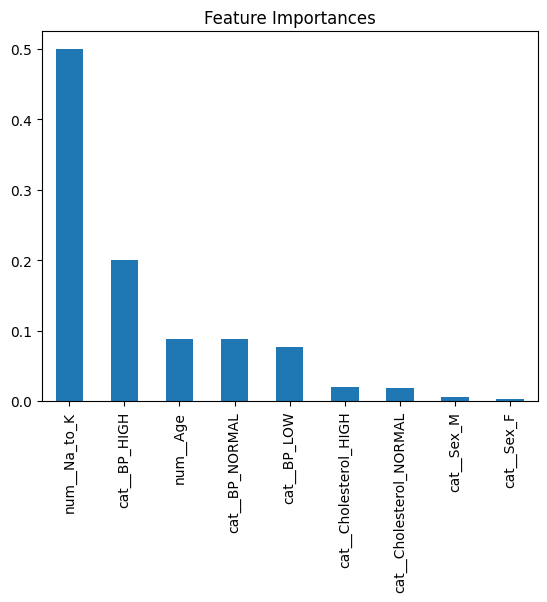

In [75]:
imp.plot(kind='bar', title='Feature Importances')

### Predicting Out of Sample data

In [76]:
xnew = pd.read_csv('test_drugs.csv')
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006
5,49,M,HIGH,NORMAL,8.700
6,58,F,LOW,HIGH,26.645
7,28,F,LOW,HIGH,13.127
8,50,F,NORMAL,NORMAL,17.211
9,23,M,LOW,HIGH,7.298


In [77]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [79]:
xnew_pre = pre.transform(xnew)
xnew_pre

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [ 0.28388946, -1.024787  ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.82924809,  1.46554276,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [-0.988614  , -0.41042702,  1.        ,  0.        ,  0

In [80]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.283889,-1.024787,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,0.829248,1.465543,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,-0.988614,-0.410427,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.344485,0.156333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,-1.291591,-1.219351,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Predict ht eresult with probabilities

In [82]:
preds = best_rfc.predict(xnew_pre)
preds

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [83]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[0.84741333, 0.        , 0.        , 0.03161267, 0.12097401],
       [0.14336523, 0.53373911, 0.21609622, 0.03444947, 0.07234996],
       [0.10925082, 0.56092716, 0.2241087 , 0.02511614, 0.08059719],
       [0.11445281, 0.0588069 , 0.01823712, 0.09980474, 0.70869844],
       [0.09586743, 0.04513769, 0.008     , 0.45243828, 0.3985566 ],
       [0.10925082, 0.54256486, 0.21226021, 0.02511614, 0.11080798],
       [0.89819829, 0.        , 0.        , 0.07498167, 0.02682005],
       [0.12340805, 0.04513769, 0.008     , 0.42702499, 0.39642927],
       [0.86226424, 0.00603774, 0.        , 0.        , 0.13169803],
       [0.09586743, 0.04984357, 0.008     , 0.44973558, 0.39655342],
       [0.13020152, 0.01984965, 0.07407135, 0.09502435, 0.68085313],
       [0.76191726, 0.05541003, 0.1779108 , 0.        , 0.0047619 ],
       [0.84145152, 0.        , 0.01142857, 0.00375   , 0.1433699 ],
       [0.90336523, 0.08345537, 0.00638695, 0.        , 0.00679245],
       [0.88072597, 0.08698175, 0.

In [84]:
import numpy as np
prob_max = np.max(prob, axis=1)
prob_max

array([0.84741333, 0.53373911, 0.56092716, 0.70869844, 0.45243828,
       0.54256486, 0.89819829, 0.42702499, 0.86226424, 0.44973558,
       0.68085313, 0.76191726, 0.84145152, 0.90336523, 0.88072597,
       0.84684421, 0.90211643, 0.55235448, 0.85559139, 0.64531197,
       0.90501878, 0.85200673, 0.90211643, 0.51578414, 0.90211643,
       0.88072597, 0.53454882, 0.44973558, 0.56142927, 0.87376878])

### Save the above probabilities and preds in xnew

In [85]:
xnew['Drug_pred'] = preds
xnew['Drug_prob'] = prob_max

In [86]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,Drug_prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.847413
1,35,F,HIGH,HIGH,12.894,drugA,0.533739
2,48,M,HIGH,NORMAL,10.446,drugA,0.560927
3,40,F,NORMAL,HIGH,10.103,drugX,0.708698
4,16,M,LOW,HIGH,12.006,drugC,0.452438
5,49,M,HIGH,NORMAL,8.700,drugA,0.542565
6,58,F,LOW,HIGH,26.645,DrugY,0.898198
7,28,F,LOW,HIGH,13.127,drugC,0.427025
8,50,F,NORMAL,NORMAL,17.211,DrugY,0.862264
9,23,M,LOW,HIGH,7.298,drugC,0.449736


<Axes: title={'center': 'Countplot for out of sample predictios'}, xlabel='Drug_pred'>

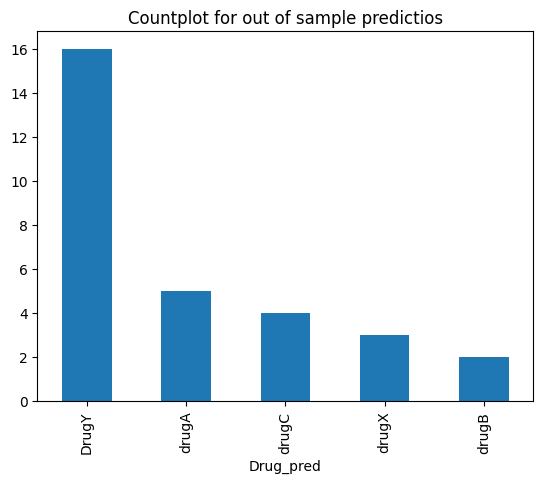

In [87]:
xnew['Drug_pred'].value_counts().plot(kind='bar', title="Countplot for out of sample predictios")

In [88]:
xnew.to_csv('Results.csv', index=False)